# Creating a Spark session

In [1]:
from pyspark.sql import *
from pyspark.sql import functions as f
from pyspark.sql.types import *

spark = SparkSession.builder.appName("SparkIntro").getOrCreate()

In [9]:
spark.conf.set('spark.executor.memory', '2g')

# The Spark UI
When you run a cell with Spark code in Jupyter, the code is submitted as a job to Spark. You can access the Spark UI on [http://127.0.0.1:4040/](http://127.0.0.1:4040/).

The Spark UI gives you all the information you need about your Spark job.

# The web traffic data

In [2]:
df = spark.read.option('delimiter', '\t').csv('/home/zach/Downloads/traffic_2')

In [3]:
df = spark.read.option('delimiter', '\t').parquet('/home/zach/Downloads/traffic_2.parquet')

In [4]:
df.show()

+---------------+-----------------+-----+
|             IP|           domain|index|
+---------------+-----------------+-----+
|  131.27.117.99|pandas.pydata.org|    0|
|  40.141.84.255|       python.org|    1|
| 49.118.194.141|pandas.pydata.org|    2|
| 170.43.117.137|    wikipedia.org|    3|
|  175.82.161.42|    wikipedia.org|    4|
|  200.96.13.120|       python.org|    5|
|134.140.117.109|    wikipedia.org|    6|
| 111.136.74.104|       python.org|    7|
|  97.146.214.83|    wikipedia.org|    8|
|149.159.115.127|pandas.pydata.org|    9|
| 81.142.132.131|       python.org|   10|
|161.250.127.110|       python.org|   11|
|  178.79.180.72|pandas.pydata.org|   12|
|  53.33.196.126|       python.org|   13|
|  61.33.198.125|       python.org|   14|
|  87.167.123.33|           dtu.dk|   15|
| 147.151.200.52|       python.org|   16|
|174.208.121.101|    wikipedia.org|   17|
| 123.155.85.124|    wikipedia.org|   18|
|119.119.206.121|           dtu.dk|   19|
+---------------+-----------------

In [13]:
distinct_ips = df.groupBy('_c1').agg(f.countDistinct('_c0'))

In [ ]:
distinct_ips.show()

In [18]:
distinct_ips.explain()

== Physical Plan ==
*(3) HashAggregate(keys=[_c1#105], functions=[count(distinct _c0#104)])
+- Exchange hashpartitioning(_c1#105, 200)
   +- *(2) HashAggregate(keys=[_c1#105], functions=[partial_count(distinct _c0#104)])
      +- *(2) HashAggregate(keys=[_c1#105, _c0#104], functions=[])
         +- Exchange hashpartitioning(_c1#105, _c0#104, 200)
            +- *(1) HashAggregate(keys=[_c1#105, _c0#104], functions=[])
               +- *(1) FileScan csv [_c0#104,_c1#105] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/home/jovyan/work/data/traffic_2], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<_c0:string,_c1:string>


## Ex 2.

In [3]:
titan_df = spark.read.option('header', True).option('inferSchema', True).csv("data/titanic.csv")

In [4]:
titan_df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|   false|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|    true|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|    true|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|    true|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|   false|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|   false|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [10]:
titan_df = titan_df.where("Age is not null")

In [17]:
titan_df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|   false|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|    true|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|    true|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|    true|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|   false|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          7|   false|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|      

In [18]:
titan_df["Age_Bracket"] = titan_df.Age % 10

TypeError: 'DataFrame' object does not support item assignment

In [25]:
titan_df = titan_df.withColumn("Age_Bracket", f.floor(f.col('Age')/10))

In [44]:
age_hist = titan_df.groupby(f.col('Age_Bracket')).count().orderBy(f.col('Age_Bracket'))

In [45]:
age_hist.show()

+-----------+-----+
|Age_Bracket|count|
+-----------+-----+
|          0|   62|
|          1|  102|
|          2|  220|
|          3|  167|
|          4|   89|
|          5|   48|
|          6|   19|
|          7|    6|
|          8|    1|
+-----------+-----+



In [46]:
import matplotlib.pyplot as plt

<BarContainer object of 9 artists>

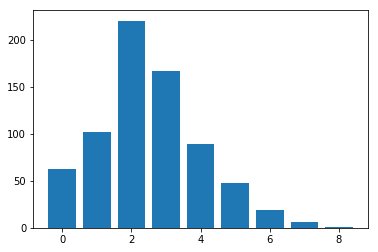

In [55]:
pddf = age_hist.toPandas()
plt.bar(pddf['Age_Bracket'], pddf['count'])

# Ex 3
Come back to this...

# EX 4.

In [57]:
!unzip ~/Downloads/simplemaps* -d ./data/simplemaps

Archive:  /home/zach/Downloads/simplemaps_worldcities_basicv1.5.zip
  inflating: ./data/simplemaps/license.txt  
  inflating: ./data/simplemaps/worldcities.csv  
  inflating: ./data/simplemaps/worldcities.xlsx  


In [59]:
cities = spark.read.option('header', True).option('inferSchema', True).csv('data/simplemaps/worldcities.csv')

In [60]:
cities.show()

+------------+------------+-------+-------+-------+----+----+------------+-------+----------+----------+
|        city|  city_ascii|    lat|    lng|country|iso2|iso3|  admin_name|capital|population|        id|
+------------+------------+-------+-------+-------+----+----+------------+-------+----------+----------+
|   Malishevë|   Malisheve|42.4822|20.7458| Kosovo|  XK| XKS|   Malishevë|  admin|      null|1901597212|
|     Prizren|     Prizren|42.2139|20.7397| Kosovo|  XK| XKS|     Prizren|  admin|      null|1901360309|
| Zubin Potok| Zubin Potok|42.9144|20.6897| Kosovo|  XK| XKS| Zubin Potok|  admin|      null|1901608808|
|    Kamenicë|    Kamenice|42.5781|21.5803| Kosovo|  XK| XKS|    Kamenicë|  admin|      null|1901851592|
|        Viti|        Viti|42.3214|21.3583| Kosovo|  XK| XKS|        Viti|  admin|      null|1901328795|
|    Shtërpcë|    Shterpce|42.2394|21.0272| Kosovo|  XK| XKS|    Shtërpcë|  admin|      null|1901828239|
|      Shtime|      Shtime|42.4331|21.0397| Kosovo|  XK

In [123]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    r = 6371
    return round(c*r, 2)

In [124]:
pdcities = cities.toPandas()

In [90]:
norman = pdcities[pdcities.city == "Norman"]
okc = pdcities[pdcities.city == "Oklahoma City"]

In [92]:
haversine(norman.lng, norman.lat, okc.lng, okc.lat)

30.093570374953007

In [145]:
hs_dist_udf = f.udf(haversine, FloatType())

In [108]:
okc.iloc[0].lng

-97.5136

In [158]:
lng, lat = f.lit(okc.iloc[0].lng), f.lit(okc.iloc[0].lat)
n = 100000
cities = cities.withColumn("dist_to", hs_dist_udf(lng, lat, f.col('lng'), f.col('lat'))).orderBy(f.col("dist_to"))
cities.where(f.col("population") > n).show()

+-------------+-------------+-------+--------+-------------+----+----+----------+-------+----------+----------+-------+
|         city|   city_ascii|    lat|     lng|      country|iso2|iso3|admin_name|capital|population|        id|dist_to|
+-------------+-------------+-------+--------+-------------+----+----+----------+-------+----------+----------+-------+
|Oklahoma City|Oklahoma City|35.4676|-97.5136|United States|  US| USA|  Oklahoma|  admin|  955998.0|1840020428|    0.0|
|       Norman|       Norman|35.2335|-97.3471|United States|  US| USA|  Oklahoma|   null|  115065.0|1840020451|  30.09|
|        Tulsa|        Tulsa|36.1284|-95.9042|United States|  US| USA|  Oklahoma|   null|  672054.0|1840021672| 162.68|
| Broken Arrow| Broken Arrow|36.0365|-95.7808|United States|  US| USA|  Oklahoma|   null|  108303.0|1840019059| 168.68|
|      Wichita|      Wichita|37.6897|-97.3442|United States|  US| USA|    Kansas|   null|  483057.0|1840001686| 247.55|
|       Denton|       Denton|33.2176|-97

In [ ]:
cities..joinwithColumn("dist_to")

In [ ]:
cities.join(cities)